### Test T

__Parte 1__

- Descargue un dataset tabular de varias características para regresión.
- Ajuste un modelo lineal de varias características.
- Para cada parámetro calculé el error estándar.
- Grafique la Función de densidad de probabilidad (PDF) de cada parámetro en una sola gráfica (con un color diferente cada una) bajo el supuesto de que está distribuido de manera normal. Marque la media de cada PDF (valor del j-esimo) parámetro.

__Parte 2__

- Implemente el test T en sus versiones one-sided y two-sided (*).
- Genere una gráfica con la distribución T adecuada (grados de libertad) para el caso de prueba de la primera parte y grafique junto a ella los valores calculados para cada t de cada parámetro del modelo y su p-value. Marque en rojo aquellos valores de t para los que se acepta la hipótesis nula y en verde aquellos casos donde se rechaza.

### Dataset precio de viajes en __Uber__ dado el número de pasajeros, distancia y fecha

In [42]:
#importar uber.csv 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from scipy.stats import norm
from scipy.stats import t

#Importar el archivo
df = pd.read_csv('uber.csv')



In [43]:
df.head(3)

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1


In [44]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.drop(['key'] , axis=1 , inplace=True)
df.head(3)


,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1


Separar la columna de fecha y hora en dos columnas diferentes

In [45]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['pickup_date'] = df['pickup_datetime'].dt.date
df['pickup_time'] = df['pickup_datetime'].dt.time
df.drop(['pickup_datetime'] , axis=1 , inplace=True)
df.head(3)

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_date,pickup_time
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,2015-05-07,19:52:06
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,2009-07-17,20:04:56
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,2009-08-24,21:45:00


Categoria de la hora del dia por mañana __(0)__ , tarde __(1)__ , noche __(2)__ y madrugada __(3)__.

In [46]:
df['pickup_time'] = df['pickup_time'].apply(lambda x: x.strftime('%H:%M:%S'))
df['pickup_time'] = pd.to_datetime(df['pickup_time'])


In [47]:
df['pickup_time'] = df['pickup_time'].dt.hour
df['pickup_time'] = df['pickup_time'].astype(int)
df['pickup_time'] = df['pickup_time'].astype(str)
df['pickup_time'] = df['pickup_time'].replace(['0','1','2','3','4','5','6'],'3')
df['pickup_time'] = df['pickup_time'].replace(['7', '8', '9', '10','11','12'],'0')
df['pickup_time'] = df['pickup_time'].replace(['13','14','15','16','17','18'],'1')
df['pickup_time'] = df['pickup_time'].replace(['19','20','21','22','23'],'2')

df.head(3)

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_date,pickup_time
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,2015-05-07,2
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,2009-07-17,2
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,2009-08-24,2


In [48]:
exportar = df.to_csv('uber_revisado.csv')

In [49]:
import folium

# Tomar una muestra aleatoria de 100 puntos para la visualización
sample_df = df.sample(n=100, random_state=1)

# Inicializar el mapa en una ubicación central de la muestra
initial_coords = [sample_df['pickup_latitude'].mean(), sample_df['pickup_longitude'].mean()]
m = folium.Map(location=initial_coords, zoom_start=13)

# Agregar los puntos de recogida al mapa
for _, row in sample_df.iterrows():
    pickup_coords = [row['pickup_latitude'], row['pickup_longitude']]
    folium.CircleMarker(location=pickup_coords, radius=5, color='blue', fill=True, fill_color='blue').add_to(m)

# Guardar el mapa en un archivo HTML
map_file_path = 'uber_pickup_map.html'
m.save(map_file_path)

map_file_path

'uber_pickup_map.html'

In [50]:
import numpy as np

# Definición de la función para calcular la distancia haversina
def haversine_distance(lon1, lat1, lon2, lat2):
    # Radio de la Tierra en kilómetros
    R = 6371.0
    
    # Convertir coordenadas de grados a radianes
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])
    
    # Diferencia en las coordenadas
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    
    # Fórmula haversina
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    
    # Distancia en kilómetros
    distance = R * c
    
    return distance

# Aplicar la función para calcular la distancia en el DataFrame
df['distancia'] = haversine_distance(df['pickup_longitude'], df['pickup_latitude'],
                                     df['dropoff_longitude'], df['dropoff_latitude'])

# Mostrar las primeras filas del DataFrame con la nueva columna 'distancia'
df.head()


,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_date,pickup_time,distancia
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,2015-05-07,2,1.683323
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,2009-07-17,2,2.457590
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,2009-08-24,2,5.036377
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,2009-06-26,0,1.661683
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,2014-08-28,1,4.475450


Crear un dataframe llamado dataframe con las columnas fare_amount , passenger_count , pickup_date , pickup_time y distancia

In [51]:
dataframe = df[['fare_amount','passenger_count','pickup_date','pickup_time','distancia']]
dataframe.head(3)

,fare_amount,passenger_count,pickup_date,pickup_time,distancia
0,7.5,1,2015-05-07,2,1.683323
1,7.7,1,2009-07-17,2,2.457590
2,12.9,1,2009-08-24,2,5.036377


In [52]:
#convertir la columna pickup_date a tipo numérico y pickup_time a tipo numérico

dataframe['pickup_time'] = dataframe['pickup_time'].astype(int)


/var/folders/zb/0l4s85s95rzbg13c3_fm6k540000gn/T/ipykernel_12568/2036497375.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['pickup_time'] = dataframe['pickup_time'].astype(int)


In [53]:
#convertir la columna pickup_date a tipo numérico
dataframe['pickup_date'] = pd.to_datetime(dataframe['pickup_date'])
dataframe['pickup_date'] = dataframe['pickup_date'].dt.strftime('%Y%m%d')
dataframe['pickup_date'] = dataframe['pickup_date'].astype(int)

/var/folders/zb/0l4s85s95rzbg13c3_fm6k540000gn/T/ipykernel_12568/3858617476.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['pickup_date'] = pd.to_datetime(dataframe['pickup_date'])
/var/folders/zb/0l4s85s95rzbg13c3_fm6k540000gn/T/ipykernel_12568/3858617476.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['pickup_date'] = dataframe['pickup_date'].dt.strftime('%Y%m%d')
/var/folders/zb/0l4s85s95rzbg13c3_fm6k540000gn/T/ipykernel_12568/3858617476.py:4: SettingWithCopyWarning: 
A value

In [54]:
dataframe.describe()

,fare_amount,passenger_count,pickup_date,pickup_time,distancia
count,200000.000000,200000.000000,2.000000e+05,200000.000000,199999.000000
mean,11.359955,1.684535,2.011807e+07,1.312505,20.855350
std,9.901776,1.385997,1.852717e+04,1.026261,382.964642
min,-52.000000,0.000000,2.009010e+07,0.000000,0.000000
25%,6.000000,1.000000,2.010082e+07,0.000000,1.215222
50%,8.500000,1.000000,2.012032e+07,1.000000,2.120992
75%,12.500000,2.000000,2.013102e+07,2.000000,3.875169
max,499.000000,208.000000,2.015063e+07,3.000000,16409.239135


In [55]:

print(len(dataframe))

200000


In [56]:
#eliminar los valores atípicos de la columna fare_amount , distancia , pickup_date,pickup_time passenger_count por medio de la desviación estándar
dataframe = dataframe[np.abs(dataframe['fare_amount']-dataframe['fare_amount'].mean())<=(3*dataframe['fare_amount'].std())]
dataframe = dataframe[np.abs(dataframe['distancia']-dataframe['distancia'].mean())<=(3*dataframe['distancia'].std())]
dataframe = dataframe[np.abs(dataframe['passenger_count']-dataframe['passenger_count'].mean())<=(3*dataframe['passenger_count'].std())]
dataframe = dataframe[np.abs(dataframe['pickup_time']-dataframe['pickup_time'].mean())<=(3*dataframe['pickup_time'].std())]
dataframe = dataframe[np.abs(dataframe['pickup_date']-dataframe['pickup_date'].mean())<=(3*dataframe['pickup_date'].std())]


dataframe.describe()

,fare_amount,passenger_count,pickup_date,pickup_time,distancia
count,190045.000000,190045.000000,1.900450e+05,190045.000000,190045.000000
mean,10.154345,1.588182,2.011764e+07,1.314815,2.940031
std,6.411927,1.153295,1.851001e+04,1.026757,4.884725
min,-10.900000,0.000000,2.009010e+07,0.000000,0.000000
25%,6.000000,1.000000,2.010081e+07,0.000000,1.199731
50%,8.100000,1.000000,2.012022e+07,1.000000,2.068624
75%,12.100000,2.000000,2.013100e+07,2.000000,3.665261
max,41.040000,5.000000,2.015063e+07,3.000000,973.369304


In [57]:

print(len(dataframe))

190045


In [58]:
X = dataframe[["passenger_count","pickup_date","pickup_time","distancia"]]
y = dataframe["fare_amount"]

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Escalado estandar

In [60]:
scaler = preprocessing.StandardScaler().fit(X_train) 
X_train_scaled = scaler.transform(X_train)

Ajusta los estimadores del modelo lineal.

In [61]:
def fit_linear_model(X, y):
    """
        Ajustar los estimadores al modelo lineal.
        Argumentos:
            X: una lista de valores.
            y: una lista de valores.
        Regresa:
            estimadores: una lista con b_1_est y b_0_est.
    """
    X = np.hstack([X, np.ones((X.shape[0], 1))]) 
    estimators = np.linalg.lstsq(X, y, rcond=None)[0]
    return estimators

Implementación del modelo lineal.

In [62]:
def linear_model(X, estimators):
    ones_array = np.ones((len(X), 1))
    X = np.hstack((X, ones_array))
    y = np.dot(X, estimators)
    
    return y

Funcion para obtener las metricas necesarias

In [63]:

def model_metrics(X, y, estimators):
    """ 
    Obteniendo algunas métricas de cualquier modelo.
        Argumentos:
            X: una lista de características.
            y: una lista de etiquetas.
            estimadores: cualquier modelo de regresión.
        Devolución:
            métricas: una lista con las siguientes métricas (SST, SSE, SSR, R ^ 2, varianza)
    """
    # Getting predictions.
    y_ests = linear_model(X, estimators)
    # Getting y_mean
    y_mean = np.array(y).mean()
    # Getting SST.
    sst = np.array([(y_i - y_mean) ** 2 for y_i in y]).sum()
    # Getting SSE.
    sse = np.array([(y_i_est - y_mean) ** 2 for y_i_est in y_ests]).sum()
    # Getting SSR.
    ssr = np.array([(y[i] - y_ests[i]) ** 2 for i in range(len(y))]).sum()
    # Getting R^2
    r_2 = ssr / sst
    # Getting variance
    variance = ssr / (X.shape[0] - (X.shape[1] + 1))
    # Save metrics. 
    metrics = [sst, sse, ssr, r_2, variance]
    
    return metrics

Funcion para obtener la varianza de cada uno de los estimadores

In [64]:
def get_variance(X, y, estimators):
    """
    Obteniendo la varianza de cada estimador.
        Argumentos:
            X: una lista de características.
            y: una lista de etiquetas.
            estimadores: cualquier modelo de regresión.
        Devolución:
            vars_j: una lista con var_j de cada característica.
    """
    
    vars_j = list()
    for j in range(X.shape[1]):
        # Obtener características.
        X_out_j = np.delete(X, j, axis = 1)
        X_j = X[:, j]
        estimators_j = np.delete(estimators, j) 
        # Obteniendo métricas.
        sst, sse, ssr, r_2, variance = model_metrics(X_out_j, X_j, estimators_j) 
        # Obtener var para cada característica.
        var_j = variance / (sst * (1 - r_2))
        vars_j.append(abs(var_j))
        
    return vars_j

Funcion para normalizar cada data

In [65]:
def normalize_data(data):
    """
    Normalizando datos min-max.
        Argumentos:
            datos: una lista de valores.
        Devolución:
            datos_norm: una lista de datos normalizados.
    """

    data_norm = list()
    # Obtener valores min-max.
    min_data = min(data)
    max_data = max(data) 
    # Normalizando cada valor.
    for datum in data:
        datum_norm = (datum - min_data) / (max_data - min_data)
        data_norm.append(datum_norm)

    return data_norm

Obtener el modelo ajustado

In [66]:
estimators = fit_linear_model(X_train_scaled, y_train)

Varianza de cada estimador

In [67]:
vars_j = get_variance(X_train_scaled, y_train, estimators)

In [68]:
# Obtener  la Normal Distribution con b_j and vars_j
N = 1000
# Inicializa los valores
distributions = list()
# Applying standard scaling.
estimators_normalized = np.array(normalize_data(estimators))
# Getting standard deviation.
desv = np.array([np.sqrt(vars_j[i]) for i in range(len(vars_j))])

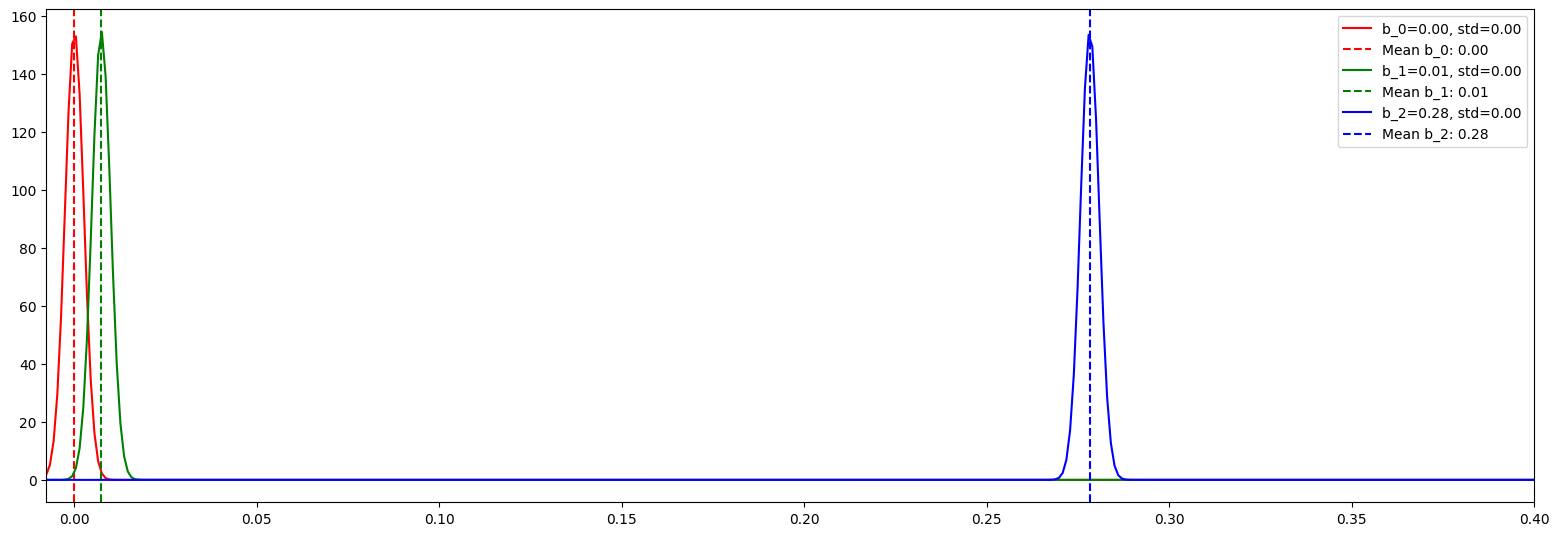

In [69]:
# Configuración para la visualización en el notebook.
%config InlineBackend.print_figure_kwargs = {'bbox_inches': 'tight'}

# Colores para las gráficas.
colors = ['red', 'green', 'blue', 'yellow', 'purple', 'orange', 'pink']

# Obtener el ancho de la celda actual (en pulgadas).
ancho_celda = plt.rcParams['figure.figsize'][0]

# Datos para el eje x (rango de valores).
x = np.linspace(min(estimators_normalized) - 3 * max(desv), max(estimators_normalized) + 3 * max(desv), N)

# Crear y mostrar las gráficas.
cont = 0
plt.figure(figsize=(ancho_celda * 3, ancho_celda))

for estimator_normalized, dev in zip(estimators_normalized, desv):
    y = norm.pdf(x, estimator_normalized, dev)
    
    # Función de densidad de probabilidad.
    plt.plot(x, y, color=colors[cont], label=f'b_{cont}={estimator_normalized:.2f}, std={dev:.2f}')
    
    # Línea vertical en la media.
    plt.axvline(x=estimator_normalized, color=colors[cont], linestyle='--', label=f'Mean b_{cont}: {estimator_normalized:.2f}')
    
    cont += 1

# Limitar el rango del eje x.
plt.xlim(min(estimators_normalized) - 3 * max(desv), 0.4)

# Mostrar la leyenda.
plt.legend()

# Mostrar el gráfico.
plt.show()

#### Muestra las distribuciones de probabilidad normal para cada estimador,  medias y desviaciones estándar.

- Curvas Continuas: Cada una representa la función de densidad de probabilidad (PDF) de un estimador normalizado. La PDF muestra cómo se distribuyen los valores alrededor de la media (el estimador normalizado en este caso).

- Líneas Verticales Punteadas: Estas líneas indican la posición de la media para cada estimador normalizado.

- Colores: Se usan diferentes colores para distinguir entre diferentes estimadores y sus respectivas PDFs y medias.



In [70]:
# Function to implement t-test.
def t_test(estimator, desv, n, len_d, alpha=0.05, two_sided=True):
    """
    t-test.
        Argumentos:
            estimadores: una lista de valores.
            desvs: una lista de valores.
            n = tamaño de la muestra.
            alfa: un valor flotante.
            two_sided: un valor booleano.
        Devolución:
            prueba: un valor booleano.
            valor crítico: un valor flotante.
            t: un valor booleano.
    
    """
    # Obtener t
    t_i = estimator / desv
    # Grados de libertad.
    dof = n - len_d - 1
    if two_sided:
        # Obtener el valor critico
        critical_value = t.ppf(1 - (alpha / 2), dof)
        test = np.abs(t_i) > critical_value
    else:
        critical_value = t.ppf(1 - alpha, dof)
        test = t > critical_value
        
    return [test, critical_value, t_i]

Valores t 

In [71]:

n = len(X_train_scaled)
two_sided = True
t_test_result = [t_test(estimator, des, n, len(desv), two_sided=two_sided) for des, estimator in zip(desv, estimators)]
for t_test_i in t_test_result:
    print(f'Critical Value: {t_test_i[1]:.2f}. t: {t_test_i[2]:7.2f}. Result test: {t_test_i[0]}')

Critical Value: 1.96. t:    6.14. Result test: True
Critical Value: 1.96. t:   35.08. Result test: True
Critical Value: 1.96. t: 1100.87. Result test: True


Obtener valores min-max

In [72]:
t = [t_test_i[2] for t_test_i in t_test_result]
min_t = min(t)
max_t = max(t)
# Inicializar valores
%config InlineBackend.print_figure_kwargs = {'bbox_inches': 'tight'}
cont = 0
 
# Obtener el ancho de la celda actual (en pulgadas).
ancho_celda = plt.rcParams['figure.figsize'][0]
# X data
x = np.linspace(min_t + 1, max_t + 1, N)
y = norm.pdf(x, 1, dev)


Función de densidad de poblacion

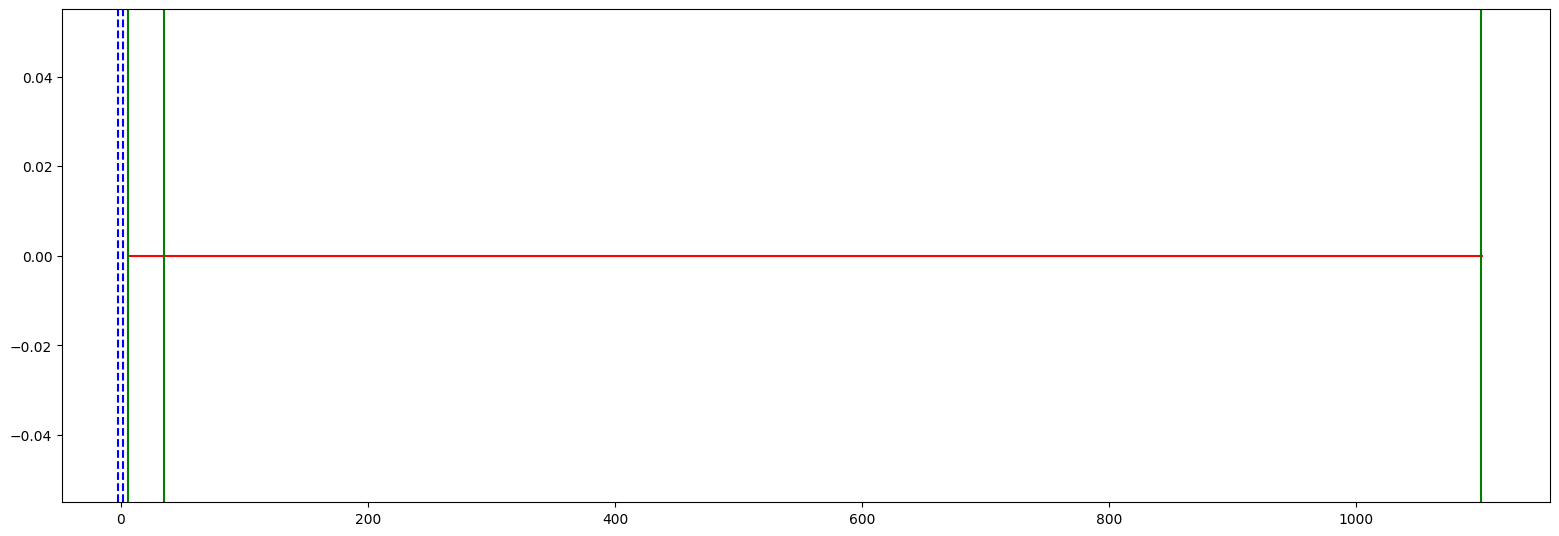

In [73]:

plt.plot(x, y, color='red', label=f't_test')
plt.axvline(x=t_test_result[0][1], color='blue', linestyle='--', label=f'c={t_test_result[0][1]:.2f}')
if two_sided:
    plt.axvline(x=-t_test_result[0][1], color='blue', linestyle='--', label=f'c={t_test_result[0][1]:.2f}')
for t_i in t:
    plt.axvline(t_i, color = 'green', label=f't={t_i}' )
plt.gcf().set_size_inches(ancho_celda*3, ancho_celda)
plt.show()